In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def compute_max_area(vertex):

    min_x = min(vertex[:,0])
    min_y = min(vertex[:,1])
    max_x = max(vertex[:,0])
    max_y = max(vertex[:,1])
    if (max_y>0) & (min_y>0):
        side_1 = max_y - min_y
    else: 
        print('max_y or min_y are wrong')
        side_1 = 300
        
    if (min_x<0) & (max_x>0):
        side_2 = abs(min_x) + max_x
    else: 
        print('min_x or max_x are wrong')
        side_2 = 600
    return round((side_1*side_2)/10000,2) #return m2

### Extract features from traces

1


,x,vel_x,y,vel_y,velocity
0,-81.781197,8.202114e-08,181.784068,4.669164e-09,3.485838e-07
1,-118.863524,7.420072e-01,172.970307,1.755438e-01,7.623074e-01
2,-142.986728,4.825677e-01,177.587811,9.274007e-02,4.912231e-01
3,-176.890959,6.784646e-01,164.573780,2.599119e-01,7.263228e-01
4,-184.249015,1.473514e-01,159.059662,1.100008e-01,1.838983e-01


2


,x,vel_x,y,vel_y,velocity
0,24.871752,4.384829e-08,226.806490,2.043940e-09,1.969250e-07
1,-31.076507,1.119413e+00,214.748649,2.401180e-01,1.144657e+00
2,-61.405336,6.067528e-01,215.119813,8.018658e-03,6.066220e-01
3,-105.744873,8.869841e-01,220.101590,1.001902e-01,8.923705e-01
4,-150.618205,8.978039e-01,212.930655,1.428905e-01,9.088538e-01


3


,x,vel_x,y,vel_y,velocity
0,136.329549,9.087011e-08,215.495693,5.817582e-08,2.251962e-07
1,82.302397,1.080876e+00,210.462754,9.962730e-02,1.085221e+00
2,42.364175,7.989449e-01,213.914408,6.977472e-02,8.017420e-01
3,-13.233132,1.112241e+00,218.024166,8.298883e-02,1.114980e+00
4,-57.148650,8.786318e-01,216.782213,2.412443e-02,8.786615e-01


4


,x,vel_x,y,vel_y,velocity
0,-53.722596,3.734434e-08,208.368803,6.012132e-08,1.661993e-07
1,0.145854,1.077467e+00,209.652534,2.581317e-02,1.077675e+00
2,42.434343,8.453060e-01,203.888308,1.162302e-01,8.535907e-01
3,89.250076,9.360779e-01,206.113783,4.407137e-02,9.373720e-01
4,133.342082,8.817342e-01,220.994188,2.973911e-01,9.307054e-01


5


,x,vel_x,y,vel_y,velocity
0,-142.934696,4.866527e-08,180.176931,8.635312e-08,1.246473e-07
1,-112.879145,6.012049e-01,191.787192,2.323429e-01,6.444018e-01
2,-94.308733,3.713991e-01,213.094825,4.261548e-01,5.652877e-01
3,-65.636383,5.732861e-01,212.778457,6.829736e-03,5.734819e-01
4,-38.574135,5.409229e-01,206.828089,1.197332e-01,5.541740e-01


6


,x,vel_x,y,vel_y,velocity
0,0.894425,4.563380e-08,167.344213,1.702741e-08,3.432355e-07
1,-68.167363,1.382603e+00,113.911620,1.067151e+00,1.746376e+00
2,-99.010969,6.175052e-01,83.628075,6.048591e-01,8.645047e-01
3,-91.205388,1.559567e-01,77.182141,1.287340e-01,2.024620e-01
4,-74.788550,3.281943e-01,69.509052,1.536142e-01,3.624300e-01


7


,x,vel_x,y,vel_y,velocity
0,-134.535270,6.124436e-08,223.944150,1.902902e-08,1.914942e-07
1,-88.579119,9.191940e-01,224.092163,3.032754e-03,9.191278e-01
2,-29.845428,1.174192e+00,221.722967,4.884108e-02,1.175629e+00
3,22.115344,1.038546e+00,221.270853,1.066210e-02,1.039255e+00
4,80.555136,1.168435e+00,223.538737,4.453380e-02,1.169676e+00


8


,x,vel_x,y,vel_y,velocity
0,-188.095013,5.991236e-08,221.676958,7.463609e-08,6.702806e-07
1,-165.526384,4.514034e-01,233.882979,2.441600e-01,5.131588e-01
2,-151.527140,2.799838e-01,246.727076,2.568834e-01,3.799735e-01
3,-133.213733,3.661797e-01,242.725937,8.035196e-02,3.749080e-01
4,-102.613686,6.119374e-01,249.805339,1.413823e-01,6.281658e-01


9


,x,vel_x,y,vel_y,velocity
0,119.961349,4.316765e-08,265.858286,6.489840e-08,2.024519e-07
1,7.069401,2.258192e+00,275.168410,1.880411e-01,2.265504e+00
2,-90.614452,1.954301e+00,263.547295,2.308455e-01,1.967454e+00
3,-175.069682,1.689815e+00,244.096558,3.878001e-01,1.733322e+00
4,-222.474411,9.487455e-01,216.771598,5.456046e-01,1.094324e+00


10


,x,vel_x,y,vel_y,velocity
0,-241.595653,7.762245e-08,127.574696,2.539376e-08,0.000004
1,-235.083623,1.301956e-01,154.642112,5.414507e-01,0.556795
2,-217.986734,3.419605e-01,169.715940,3.014802e-01,0.455861
3,-185.405164,6.516397e-01,182.727659,2.602073e-01,0.701673
4,-154.149318,6.251184e-01,189.603008,1.374830e-01,0.640062


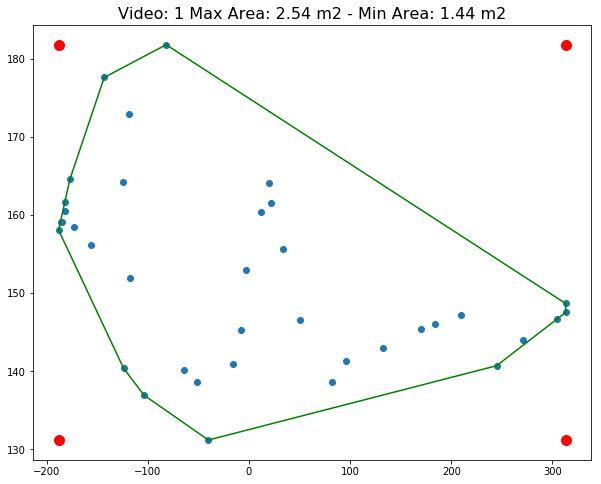

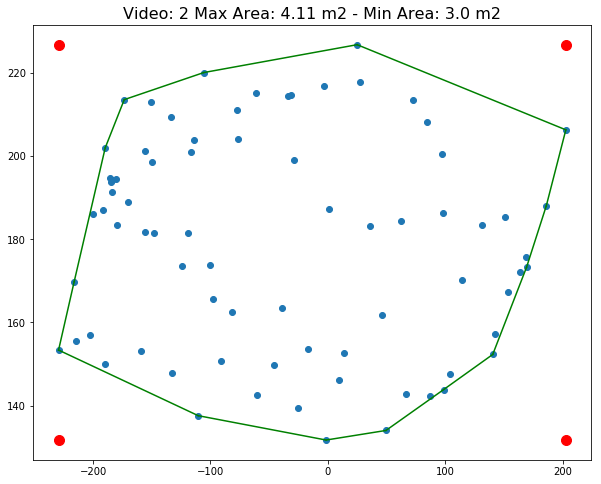

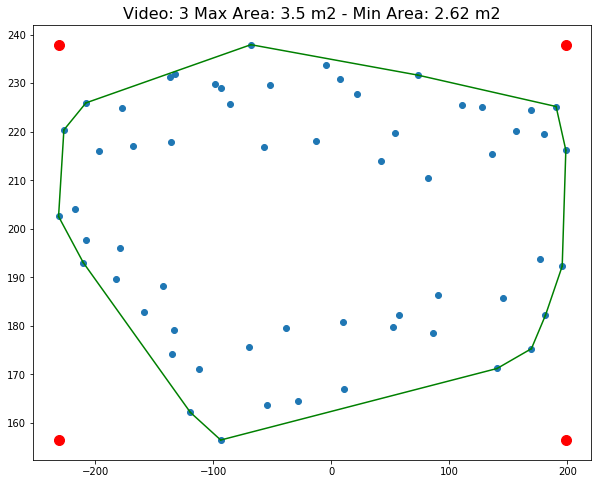

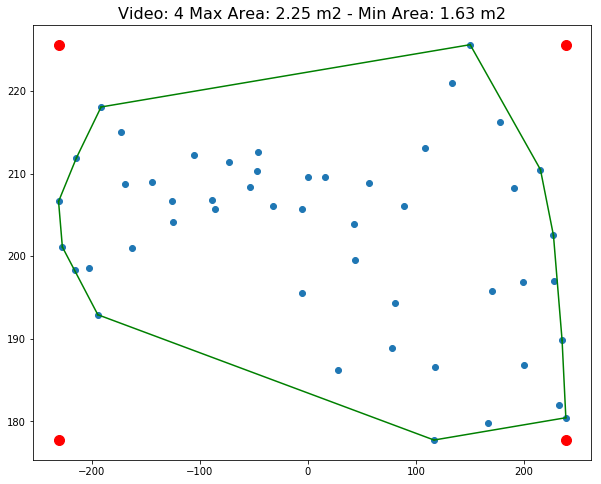

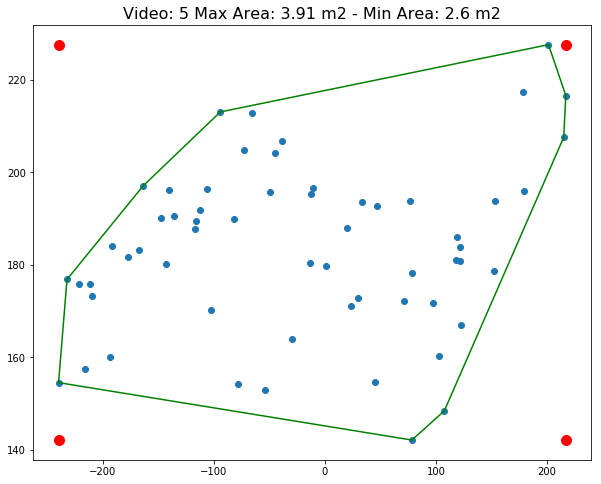

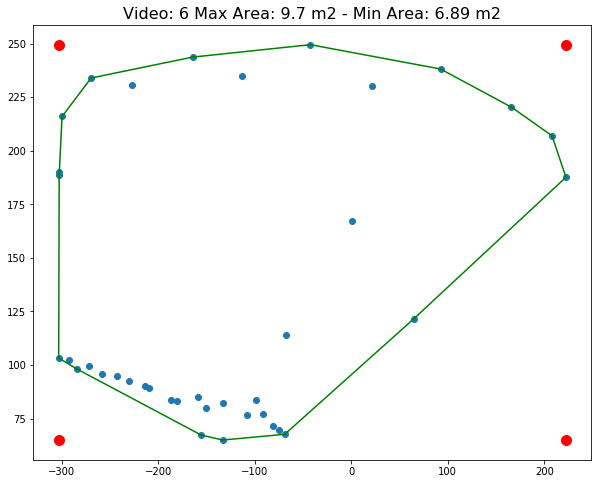

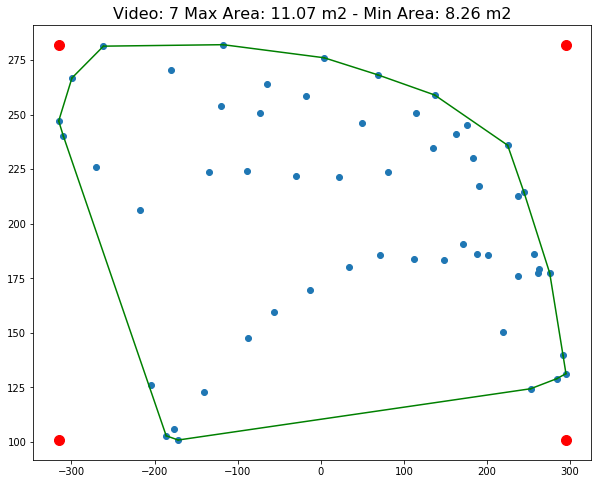

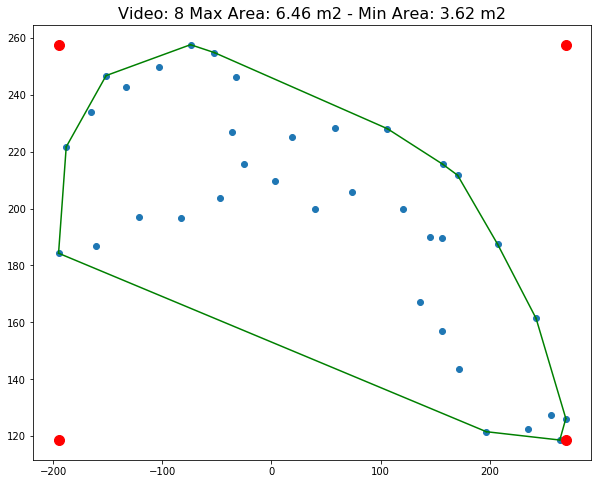

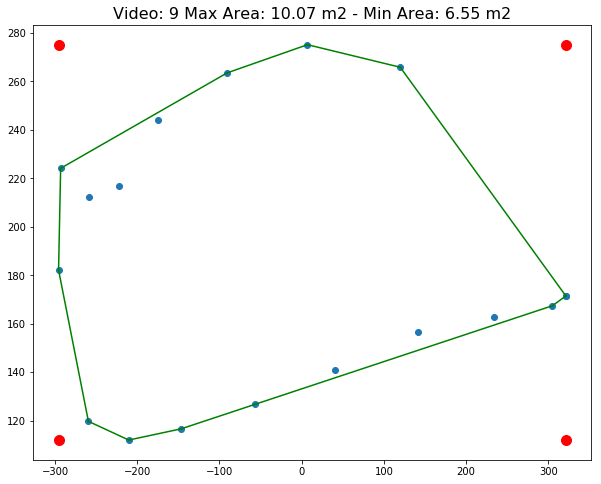

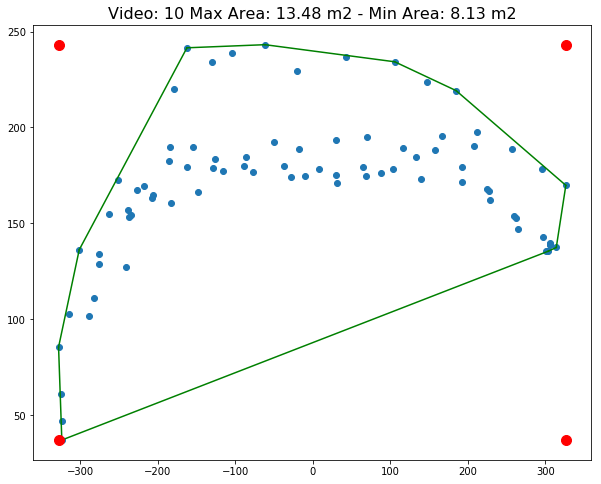

In [3]:
video_number_list = []
lenght_video_list = []
average_speed = []
max_speed = []
min_area_polygon = []
max_area_polygon = []

video_list = range(1,11)

for video_number in video_list:
    print(video_number)
    data = pd.read_csv('../Data/Data fusion/Video{} - fusion.csv'.format(video_number))
    display(data.head())
    video_number_list.append(video_number)
    hull = ConvexHull(data[['x','y']].values,qhull_options='QbB')
    vertices_one = data[['x','y']].values[hull.vertices]
    polygon = Polygon(vertices_one)
    min_area = round(polygon.area/10000,2) #to convert from cm2 to m2
    max_area = compute_max_area(vertices_one) 

    min_area_polygon.append(min_area) #to convert from cm2 to m2
    max_area_polygon.append(max_area) 
    f = plt.figure(figsize=[10,8])
    f = plt.plot(data['x'], data['y'],'o')
    for simplex in hull.simplices:
        f = plt.plot(data.x.values[simplex], data.y.values[simplex], 'g-')
    f = plt.plot(min(data.x.values),min(data.y.values),'or',MarkerSize=10)
    f = plt.plot(max(data.x.values),max(data.y.values),'or',MarkerSize=10)
    f = plt.plot(min(data.x.values),max(data.y.values),'or',MarkerSize=10)
    f = plt.plot(max(data.x.values),min(data.y.values),'or',MarkerSize=10)


    f = plt.title('Video: '+str(video_number) +' Max Area: '+str(round(max_area,2))+' m2 - Min Area: '+str(min_area)+' m2',fontsize=16)
    lenght_video_list.append(len(data)*0.5)
    average_speed.append(data['velocity'].mean())
    max_speed.append(data['velocity'].max())

### Unique table for all videos

In [4]:
table_video = pd.DataFrame()
table_video['video number']  =  video_number_list
table_video['duration']  =  lenght_video_list
table_video['avg speed']  =  average_speed
table_video['max speed']  =  max_speed
table_video['min area'] = min_area_polygon
table_video['max area'] = max_area_polygon

In [5]:
table_video

,video number,duration,avg speed,max speed,min area,max area
0,1,18.5,0.362611,0.803332,1.44,2.54
1,2,37.5,0.595782,1.367789,3.00,4.11
2,3,29.5,0.692315,1.280355,2.62,3.50
3,4,24.5,0.706288,1.077675,1.63,2.25
4,5,29.5,0.566432,1.046571,2.60,3.91
5,6,19.0,0.830020,4.127448,6.89,9.70
6,7,27.5,0.836261,1.643153,8.26,11.07
7,8,18.0,0.622250,1.040123,3.62,6.46
8,9,9.0,1.251028,2.265504,6.55,10.07
9,10,40.5,0.713389,1.618858,8.13,13.48


### Apply Umap for dimentionality reduction

In [6]:
import umap
from sklearn.cluster import KMeans

In [7]:
table = table_video.drop(['video number'], axis=1)

embedding = umap.UMAP().fit_transform(table.values)

C:\Users\simon\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


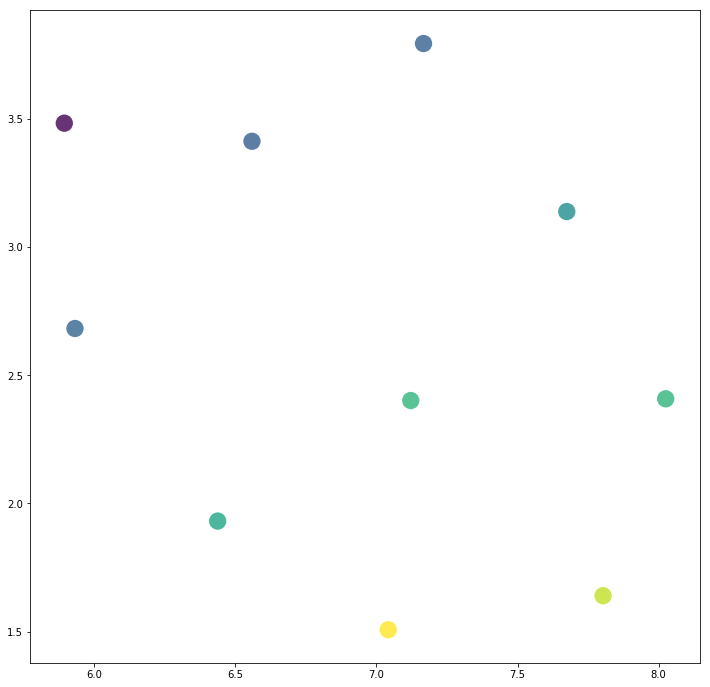

In [8]:
plt.figure(figsize=(12,12))
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c=table.iloc[:, 0], 
            edgecolor='none', 
            alpha=0.80, 
            s=300,
            marker = 'o'
           );


### Apply kmeans for clustering - Anomaly detection

In [9]:
number_of_clusters = 2

kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(embedding)
kmeans.labels_

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [10]:
table_video['cluster'] = kmeans.labels_
table_video

,video number,duration,avg speed,max speed,min area,max area,cluster
0,1,18.5,0.362611,0.803332,1.44,2.54,1
1,2,37.5,0.595782,1.367789,3.00,4.11,0
2,3,29.5,0.692315,1.280355,2.62,3.50,0
3,4,24.5,0.706288,1.077675,1.63,2.25,0
4,5,29.5,0.566432,1.046571,2.60,3.91,0
5,6,19.0,0.830020,4.127448,6.89,9.70,1
6,7,27.5,0.836261,1.643153,8.26,11.07,0
7,8,18.0,0.622250,1.040123,3.62,6.46,1
8,9,9.0,1.251028,2.265504,6.55,10.07,1
9,10,40.5,0.713389,1.618858,8.13,13.48,0


In [11]:
for cluster_number in range(number_of_clusters):
    print('\n-------- cluster number: {} -------- \n'.format(cluster_number))
    table_frame = table_video[table_video['cluster']==cluster_number]
    display(table_frame)
    for column in table_video.columns.drop(['video number','cluster']):
        display('{} std: {}'.format(column, table_frame[[column]].std()[0]))   


-------- cluster number: 0 -------- 



,video number,duration,avg speed,max speed,min area,max area,cluster
1,2,37.5,0.595782,1.367789,3.00,4.11,0
2,3,29.5,0.692315,1.280355,2.62,3.50,0
3,4,24.5,0.706288,1.077675,1.63,2.25,0
4,5,29.5,0.566432,1.046571,2.60,3.91,0
6,7,27.5,0.836261,1.643153,8.26,11.07,0
9,10,40.5,0.713389,1.618858,8.13,13.48,0


'duration std: 6.164414002968976'

'avg speed std: 0.0961359644512148'

'max speed std: 0.2564771990697687'

'min area std: 2.994980244787379'

'max area std: 4.669281172371896'


-------- cluster number: 1 -------- 



,video number,duration,avg speed,max speed,min area,max area,cluster
0,1,18.5,0.362611,0.803332,1.44,2.54,1
5,6,19.0,0.830020,4.127448,6.89,9.70,1
7,8,18.0,0.622250,1.040123,3.62,6.46,1
8,9,9.0,1.251028,2.265504,6.55,10.07,1


'duration std: 4.767511580129268'

'avg speed std: 0.375382540669722'

'max speed std: 1.5205190184842128'

'min area std: 2.5813497761184294'

'max area std: 3.499994047613986'